In [1]:
import numpy as np
import pandas as  pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
import keras_tuner as kt
import tensorflow as tf
import time
from sklearn.utils import class_weight
from sklearn.decomposition import PCA
from tensorflow.keras.optimizers import Adafactor
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

In [2]:
df_train = pd.read_csv('PKDDTrain+.csv')
df_test = pd.read_csv('PKDDTest+.csv')
df_train20 = pd.read_csv('PKDDTrain+_20Percent.csv')
df_test20 = pd.read_csv('PKDDTest-20.csv')
df = pd.concat([df_train], axis=0, ignore_index=True)
# , df_test20, df_test, df_test20

In [3]:
df.drop_duplicates()
df.shape

(125973, 123)

In [4]:
df['labels2'].value_counts(), df['labels5'].value_counts()

(labels2
 normal     67343
 anomaly    58630
 Name: count, dtype: int64,
 labels5
 normal    67343
 DoS       45927
 Probe     11656
 R2L         995
 U2R          52
 Name: count, dtype: int64)

# Treating Missing Values using Mean

In [5]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns_to_fill = [col for col in numerical_columns ]
df_mean = df[numerical_columns_to_fill].stack().mean()
df[numerical_columns_to_fill] = df[numerical_columns_to_fill].fillna(df_mean)

# Normalization of Dataset 

In [6]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Seprating Target from Features 

In [7]:
X2 = df.drop(columns=['labels2', 'labels5'])
y2 = df['labels2']


In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)  # Specify the number of components you want
X_pca = pca.fit_transform(X2)

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.41249065 0.15650716 0.10941839 0.05073433 0.0410607  0.028222
 0.02268747 0.0197981  0.01497864 0.0137857 ]


# Label encoding

In [9]:
encoder = LabelEncoder()
y2 = encoder.fit_transform(y2)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y2, test_size=0.2, random_state=42)

# Model Tranning

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



# Define the SVM model with the given parameters
svm = SVC(C=100, gamma=1, kernel='rbf')

# Train the model
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy}")

# # Optionally, you can save the model
# import joblib
# joblib.dump(svm, 'svm_model_with_given_params.pkl')


Test Set Accuracy: 0.9902758483826156


Test Set Accuracy: 0.9902758483826156
Confusion Matrix:
[[11604   169]
 [   76 13346]]
AUC: 0.9985838061204552


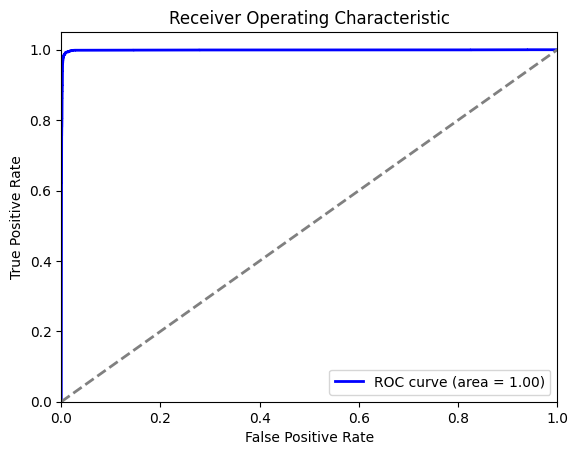

['svm_model_with_given_params.pkl']

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import time


time_trainst = time.time()
# Define the SVM model with the given parameters
svm = SVC(C=100, gamma=1, kernel='rbf', probability=True)

# Train the model
svm.fit(X_train, y_train)
time_trainend = time.time()
time_train = time_trainend - time_trainst
time_train

time_predst = time.time()
# Predict on the test set
y_pred = svm.predict(X_test)
y_proba = svm.predict_proba(X_test)[:, 1]
time_predend = time.time()
tim_pred = time_predend - time_predst
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate FPR, TPR, and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:0.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Optionally, you can save the model
import joblib
joblib.dump(svm, 'svm_model_with_given_params.pkl')


In [13]:
tim_pred, time_train

(24.407874822616577, 376.1919310092926)

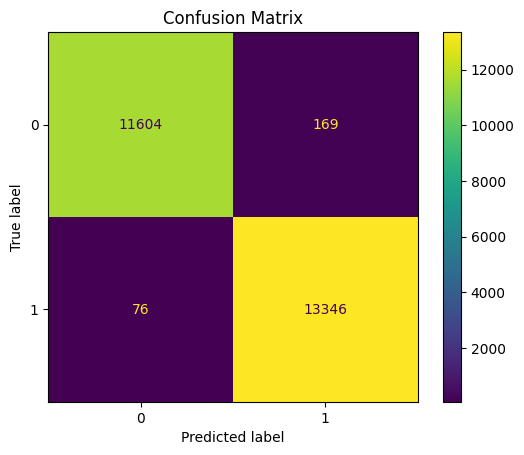

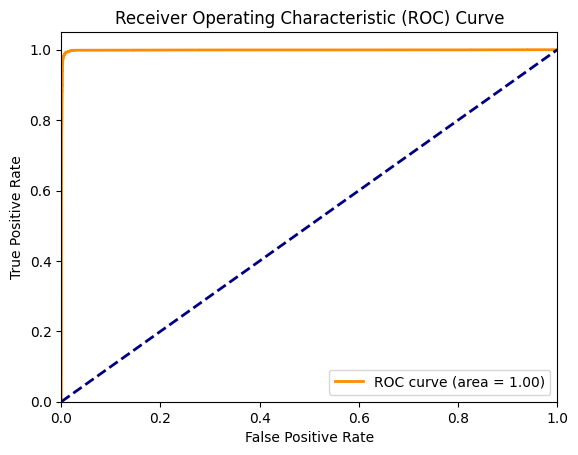

Accuracy: 0.9903
Precision: 0.9875
Recall (TPR): 0.9943
F1-Score: 0.9909
NPV: 0.9935
TPR (Recall): 0.9943
FNR: 0.0057
FPR: 0.0144
Specificity: 0.9856
Training Time: 376.1919 seconds
Prediction Time: 18.1894 seconds


In [19]:
import time
import numpy as np
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, roc_curve, auc, classification_report
)
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.svm import SVC
# Prediction
t_ptimest = time.time()
y_pred_class = svm.predict(X_test)
y_pred_prob = svm.predict_proba(X_test)[:, 1]  # Probability for the positive class (1)
t_ptimeed = time.time()
pred_time = t_ptimeed - t_ptimest

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_class)
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred_class)

# Precision
precision = precision_score(y_test, y_pred_class)

# Recall (Sensitivity or TPR)
recall = recall_score(y_test, y_pred_class)

# F1-Score
f1 = f1_score(y_test, y_pred_class)

# Negative Predictive Value (NPV)
tn, fp, fn, tp = cm.ravel()
npv = tn / (tn + fn)

# True Positive Rate (TPR) or Sensitivity (same as recall)
tpr = recall

# False Negative Rate (FNR)
fnr = fn / (fn + tp)

# False Positive Rate (FPR)
fpr_value = fp / (fp + tn)

# Specificity or True Negative Rate (TNR)
specificity = tn / (tn + fp)

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall (TPR): {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'NPV: {npv:.4f}')
print(f'TPR (Recall): {tpr:.4f}')
print(f'FNR: {fnr:.4f}')
print(f'FPR: {fpr_value:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f'Training Time: {time_train:.4f} seconds')
print(f'Prediction Time: {pred_time:.4f} seconds')

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'sigmoid']
}

# Initialize the SVM model
svm = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# List all hyperparameters and their corresponding scores
results = pd.DataFrame(grid_search.cv_results_)
params_scores = results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
print(params_scores)

# Predict on the test set using the best model
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy}")

# Optionally, you can save the best model
import joblib
joblib.dump(grid_search.best_estimator_, 'best_svm_model.pkl')


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 4.0min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 5.7min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 4.3min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 5.1min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 5.7min
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time= 4.2min
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time= 4.3min
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time= 2.7min
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time= 2.5min
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time= 2.5min
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=27.5min
[CV] END .....................C=0.1, gamma=1, k

['best_svm_model.pkl']